In [1]:
import json


with open("data/isoflops_curves.json", "r") as f:
    data = json.load(f)

In [2]:
import pandas as pd


df = pd.DataFrame(data)

In [3]:
df

,parameters,compute_budget,final_loss
0,49999999,6.000000e+18,7.192785
1,78730505,6.000000e+18,6.750171
2,123969849,6.000000e+18,6.406640
3,195204177,6.000000e+18,6.154369
4,307370470,6.000000e+18,5.987783
...,...,...,...
67,12148905329,3.000000e+21,3.773188
68,20577985689,3.000000e+21,3.776239
69,34855279842,3.000000e+21,3.816546
70,59038360277,3.000000e+21,3.895885


In [4]:
n_opt = df.loc[df.groupby("compute_budget")["final_loss"].idxmin()]

n_opt

,parameters,compute_budget,final_loss
6,762093419,6.000000e+18,5.899930
13,806647749,1.000000e+19,5.617943
20,1536852354,3.000000e+19,5.107177
27,1952041776,6.000000e+19,4.830586
35,3253402960,1.000000e+20,4.652893
46,5903836027,3.000000e+20,4.311219
53,6971055968,6.000000e+20,4.121241
60,6859328563,1.000000e+21,4.002835
67,12148905329,3.000000e+21,3.773188


In [5]:
from scipy.optimize import curve_fit


def func(x, a, b):
    return a * x**b


popt, pcov = curve_fit(func, n_opt["compute_budget"], n_opt["parameters"])

In [6]:
popt, pcov

(array([25.79298341,  0.40381138]),
 array([[ 1.72273745e+03, -1.37578211e+00],
        [-1.37578211e+00,  1.09936121e-03]]))

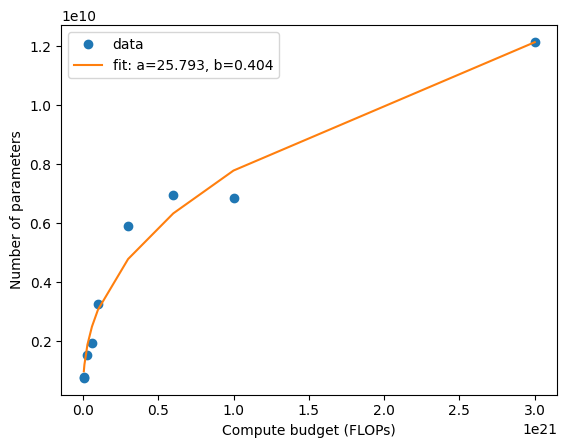

In [7]:
import matplotlib.pyplot as plt


plt.plot(n_opt["compute_budget"], n_opt["parameters"], "o", label="data")
plt.plot(
    n_opt["compute_budget"],
    func(n_opt["compute_budget"], *popt),
    label="fit: a=%5.3f, b=%5.3f" % tuple(popt),
)
plt.xlabel("Compute budget (FLOPs)")
plt.ylabel("Number of parameters")
plt.legend()

In [8]:
func(10**23, *popt) / 10**9

np.float64(50.02225491233104)

In [9]:
func(10**24, *popt) / 10**9

np.float64(126.75778531998223)

In [10]:
n_opt["num_tokens"] = n_opt["compute_budget"] / (6 * n_opt["parameters"])

n_opt

,parameters,compute_budget,final_loss,num_tokens
6,762093419,6.000000e+18,5.899930,1.312175e+09
13,806647749,1.000000e+19,5.617943,2.066164e+09
20,1536852354,3.000000e+19,5.107177,3.253403e+09
27,1952041776,6.000000e+19,4.830586,5.122841e+09
35,3253402960,1.000000e+20,4.652893,5.122841e+09
46,5903836027,3.000000e+20,4.311219,8.469070e+09
53,6971055968,6.000000e+20,4.121241,1.434503e+10
60,6859328563,1.000000e+21,4.002835,2.429781e+10
67,12148905329,3.000000e+21,3.773188,4.115597e+10


In [11]:
(1 / (6 * popt[0]), 1 - popt[1])

(np.float64(0.006461705650299625), np.float64(0.5961886223405963))

In [12]:
popt, pcov = curve_fit(func, n_opt["compute_budget"], n_opt["num_tokens"])

In [13]:
popt

array([0.00633759, 0.59677071])

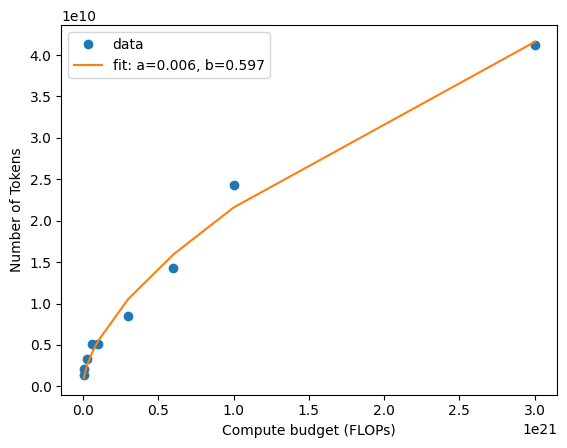

In [14]:
plt.plot(n_opt["compute_budget"], n_opt["num_tokens"], "o", label="data")
plt.plot(
    n_opt["compute_budget"],
    func(n_opt["compute_budget"], *popt),
    label="fit: a=%5.3f, b=%5.3f" % tuple(popt),
)
plt.xlabel("Compute budget (FLOPs)")
plt.ylabel("Number of Tokens")
plt.legend()

In [15]:
func(10**24, *popt) / 10**12

np.float64(1.3317448400504712)

In [16]:
func(10**25, *popt) / 10**12

np.float64(5.26249544195097)